In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import csv
import os

In [ ]:
#Dataset(dataset_ChemSpider.csv) is defined
df = pd.read_csv('dataset_ChemSpider.csv', encoding='latin1')
df.head()

,Compound Name,Smiles,Molecular weight (Da),LogP,Hydrogen Bond donors,Hydrogen Bond Acceptors,Lipinski following,Unnamed: 7
0,PA1,O=C(OC)CCN(CCC(OC)=O)C1=CC=C(OC)C=C1,295.340,1.886,0,5,YES (0),NaN
1,PA2,O=C(OCC)CCN(CCC(OCC)=O)C1=CC=C(OC)C=C1,323.394,2.583,0,5,YES (0),NaN
2,PA3,O=C(OC)CCN(CCC(OC)=O)C1=CC=C(OCC)C=C1,309.367,2.235,0,5,YES (0),NaN
3,PA4,O=C(OCC)CCN(CCC(OCC)=O)C1=CC=C(OCC)C=C1,337.421,2.932,0,5,YES (0),NaN
4,PA Acid 1,O=C(O)CCN(CCC(O)=O)C1=CC=C(OC)C=C1,267.286,1.435,2,5,YES (0),NaN


In [ ]:
#Verify the columns of the dataset
df.columns

Index(['Compound Name', 'Smiles', 'Molecular weight (Da)', 'LogP',
       'Hydrogen Bond donors', 'Hydrogen Bond Acceptors', 'Lipinski following',
       'Unnamed: 7'],
      dtype='object')

In [ ]:
#Install padel descriptor
!pip install padelpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 41.2 MB/s eta 0:00:00


In [ ]:
#Import padel descriptor for molecular descriptor generation
from padelpy import padeldescriptor

In [ ]:
#Rename a comlumn according to your analysis (optional)
df.rename(columns = {'Compound Name':'Symbol'}, inplace = True)

#Generate SMILES file for molecular descriptor generation
df2 = pd.concat( [df['Smiles'],df['Symbol']], axis=1 )
df2.to_csv('SMILES.smi', sep='\t', index=False, header=False)

In [ ]:
#Molecular descriptor is generated as padel_descripted.
padeldescriptor(mol_dir='SMILES.smi', removesalt=True, d_2d=True, d_file='padel_descripted.csv')

In [ ]:
#The molecular descriptor is employed in the algorithm
df3 = pd.read_csv(r"padel_descripted.csv")

In [ ]:
#Remove irrelevant data/s
df4 = df3.drop("Name", axis=1)
df4.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,0.5864,0.343865,82.3246,45.512653,0,0,42,21,21,...,7.027190,41.107630,1.957506,16.565327,13.091660,3.473666,1034.0,27.0,1.312,94.0
1,0,1.0872,1.182004,90.9122,51.699825,0,0,48,23,25,...,6.732777,45.103216,1.961009,16.938264,13.454634,3.483631,1354.0,29.0,2.158,102.0
2,0,0.8368,0.700234,86.6184,48.606239,0,0,45,22,23,...,6.870169,43.118908,1.959950,16.715640,13.238653,3.476988,1193.0,28.0,1.735,98.0
3,0,1.3376,1.789174,95.2060,54.793411,0,0,51,24,27,...,6.611548,47.114528,1.963105,17.088578,13.601626,3.486952,1539.0,30.0,2.581,106.0


In [ ]:
# Correlate the descriptors
corr = df4.corr()
corr.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
nAcid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALogP,NaN,1.000000,0.993293,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,...,-0.998330,0.999996,0.990002,0.996761,0.996892,0.989949,0.999313,1.000000,1.000000,1.000000
ALogp2,NaN,0.993293,1.000000,0.993293,0.993293,NaN,NaN,0.993293,0.993293,0.993293,...,-0.984961,0.993290,0.978370,0.990075,0.990205,0.983310,0.996619,0.993293,0.993293,0.993293
AMR,NaN,1.000000,0.993293,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,...,-0.998330,0.999996,0.990002,0.996761,0.996892,0.989949,0.999313,1.000000,1.000000,1.000000
apol,NaN,1.000000,0.993293,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,...,-0.998330,0.999996,0.990002,0.996761,0.996892,0.989949,0.999313,1.000000,1.000000,1.000000


<Axes: >

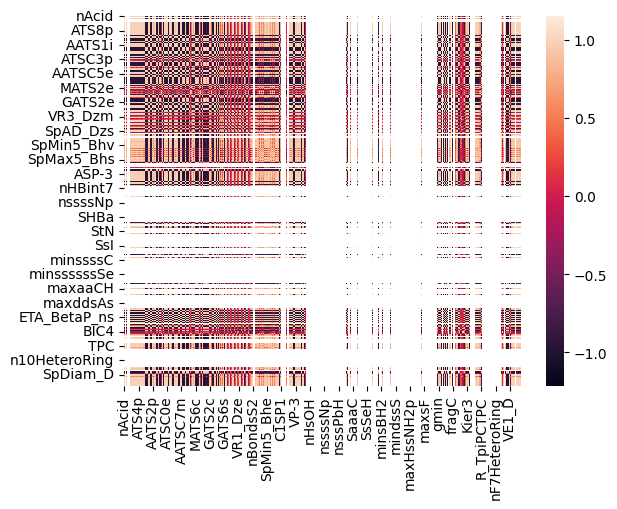

In [ ]:
# Import necessary libraries for plotting and heatmap generation
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr)

In [ ]:
# Visualize the correlated values
print(corr)

        nAcid     ALogP    ALogp2       AMR      apol  naAromAtom  nAromBond  \
nAcid     NaN       NaN       NaN       NaN       NaN         NaN        NaN   
ALogP     NaN  1.000000  0.993293  1.000000  1.000000         NaN        NaN   
ALogp2    NaN  0.993293  1.000000  0.993293  0.993293         NaN        NaN   
AMR       NaN  1.000000  0.993293  1.000000  1.000000         NaN        NaN   
apol      NaN  1.000000  0.993293  1.000000  1.000000         NaN        NaN   
...       ...       ...       ...       ...       ...         ...        ...   
WTPT-5    NaN  0.989949  0.983310  0.989949  0.989949         NaN        NaN   
WPATH     NaN  0.999313  0.996619  0.999313  0.999313         NaN        NaN   
WPOL      NaN  1.000000  0.993293  1.000000  1.000000         NaN        NaN   
XLogP     NaN  1.000000  0.993293  1.000000  1.000000         NaN        NaN   
Zagreb    NaN  1.000000  0.993293  1.000000  1.000000         NaN        NaN   

           nAtom  nHeavyAtom        nH 

<Axes: >

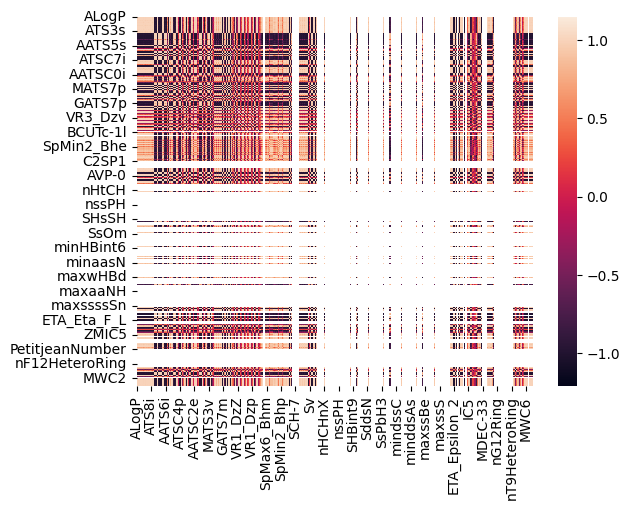

In [ ]:
# Plot the strongest positive correlated descriptors (this may differ depending on the type of analysis implemented)
sns.heatmap(corr)